In [13]:
import numpy as np
import matplotlib
import pandas as pd

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [14]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization

2024-06-27 10:08:29.503134: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
# Initialize MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression task
])

# Compile the model
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mae')

# Print model summary
mlp_model.summary()

# Train the model
history = mlp_model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2)

# Evaluate model performance
Y_pred = mlp_model.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 25.6784 - val_loss: 20.5032
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.7539 - val_loss: 21.0754
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19.3748 - val_loss: 19.3935
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5073 - val_loss: 19.8012
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.1926 - val_loss: 17.8513
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.4008 - val_loss: 17.2526
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.4460 - val_loss: 16.6571
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.4179 - val_loss: 15.7232
Epoch 9/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6474 - val_loss: 14.9837
Epoch 10/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.3292 - val_loss: 14.6595
Epoch 11/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3536 - val_loss: 14.5212
Epoch 12/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
history = mlp_model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.3534 - val_loss: 9.7875
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.5987 - val_loss: 9.3717
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8780 - val_loss: 9.1275
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3608 - val_loss: 9.1722
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.4125 - val_loss: 9.4337
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.5127 - val_loss: 9.0812
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8276 - val_loss: 9.1616
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.1028 - val_loss: 9.0700
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.4400 - val_loss: 9.4821
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2601 - val_loss: 9.2202
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0555 - val_loss: 9.1909
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9

In [18]:
res = mlp_model.predict(X_test)
print(res)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 1.33443511e+00]
 [ 9.32122009e+02]
 [ 2.77381897e+00]
 [ 4.48729019e+01]
 [ 9.18382931e+00]
 [ 7.63790359e+01]
 [ 2.79264584e+01]
 [ 7.15880051e+01]
 [ 7.20932102e+00]
 [ 6.69314098e+00]
 [ 3.94633675e+01]
 [ 1.10727669e+02]
 [ 1.72385585e+00]
 [ 1.00624495e+01]
 [ 3.70725918e+00]
 [ 8.63675499e+00]
 [ 3.95553875e+00]
 [ 2.43563604e+00]
 [ 6.57702446e+00]
 [ 6.15432892e+01]
 [ 3.29766769e+01]
 [ 3.19955301e+00]
 [ 7.27849770e+00]
 [ 3.42782331e+00]
 [ 1.13424625e+01]
 [ 6.18569994e+00]
 [ 1.78012066e+01]
 [ 7.40015221e+00]
 [ 1.46242966e+02]
 [ 4.87803793e+00]
 [ 1.18447685e+01]
 [ 1.48492165e+01]
 [ 2.19436932e+01]
 [ 1.30515566e+01]
 [ 4.03467979e+01]
 [ 1.17783422e+01]
 [ 2.24492683e+01]
 [ 7.63594723e+00]
 [ 1.53830633e+01]
 [ 1.10418739e+01]
 [ 7.77650881e+00]
 [ 1.51821747e+01]
 [ 5.05948448e+00]
 [ 2.72338748e+00]
 [ 1.92859018e+00]
 [ 1.06502476e+01]
 [ 1.96297436e+01]
 [ 1.35842800e+01]
 [ 3.93971252e+00]
 [ 5.40938139e-01]
 [ 2.0544420

In [19]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.6143033269824065


In [20]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

9.84859313008686


In [21]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.5585302446089413


In [22]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)

37.98234637337568


In [23]:
import shap

In [24]:
explainer = shap.KernelExplainer(mlp_model,data = X_test, link = "identity")
shap_values = explainer.shap_values(X_test)




Using 168 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


100%|██████████| 168/168 [04:30<00:00,  1.61s/it]


In [25]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [30]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
explainer = shap.KernelExplainer(model=regr.predict, data=X_train, link="identity")
shap_values = explainer.shap_values(X_test, nsamples=100)

Using 671 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 168/168 [01:49<00:00,  1.54it/s]


In [27]:
import matplotlib.pyplot as plt 

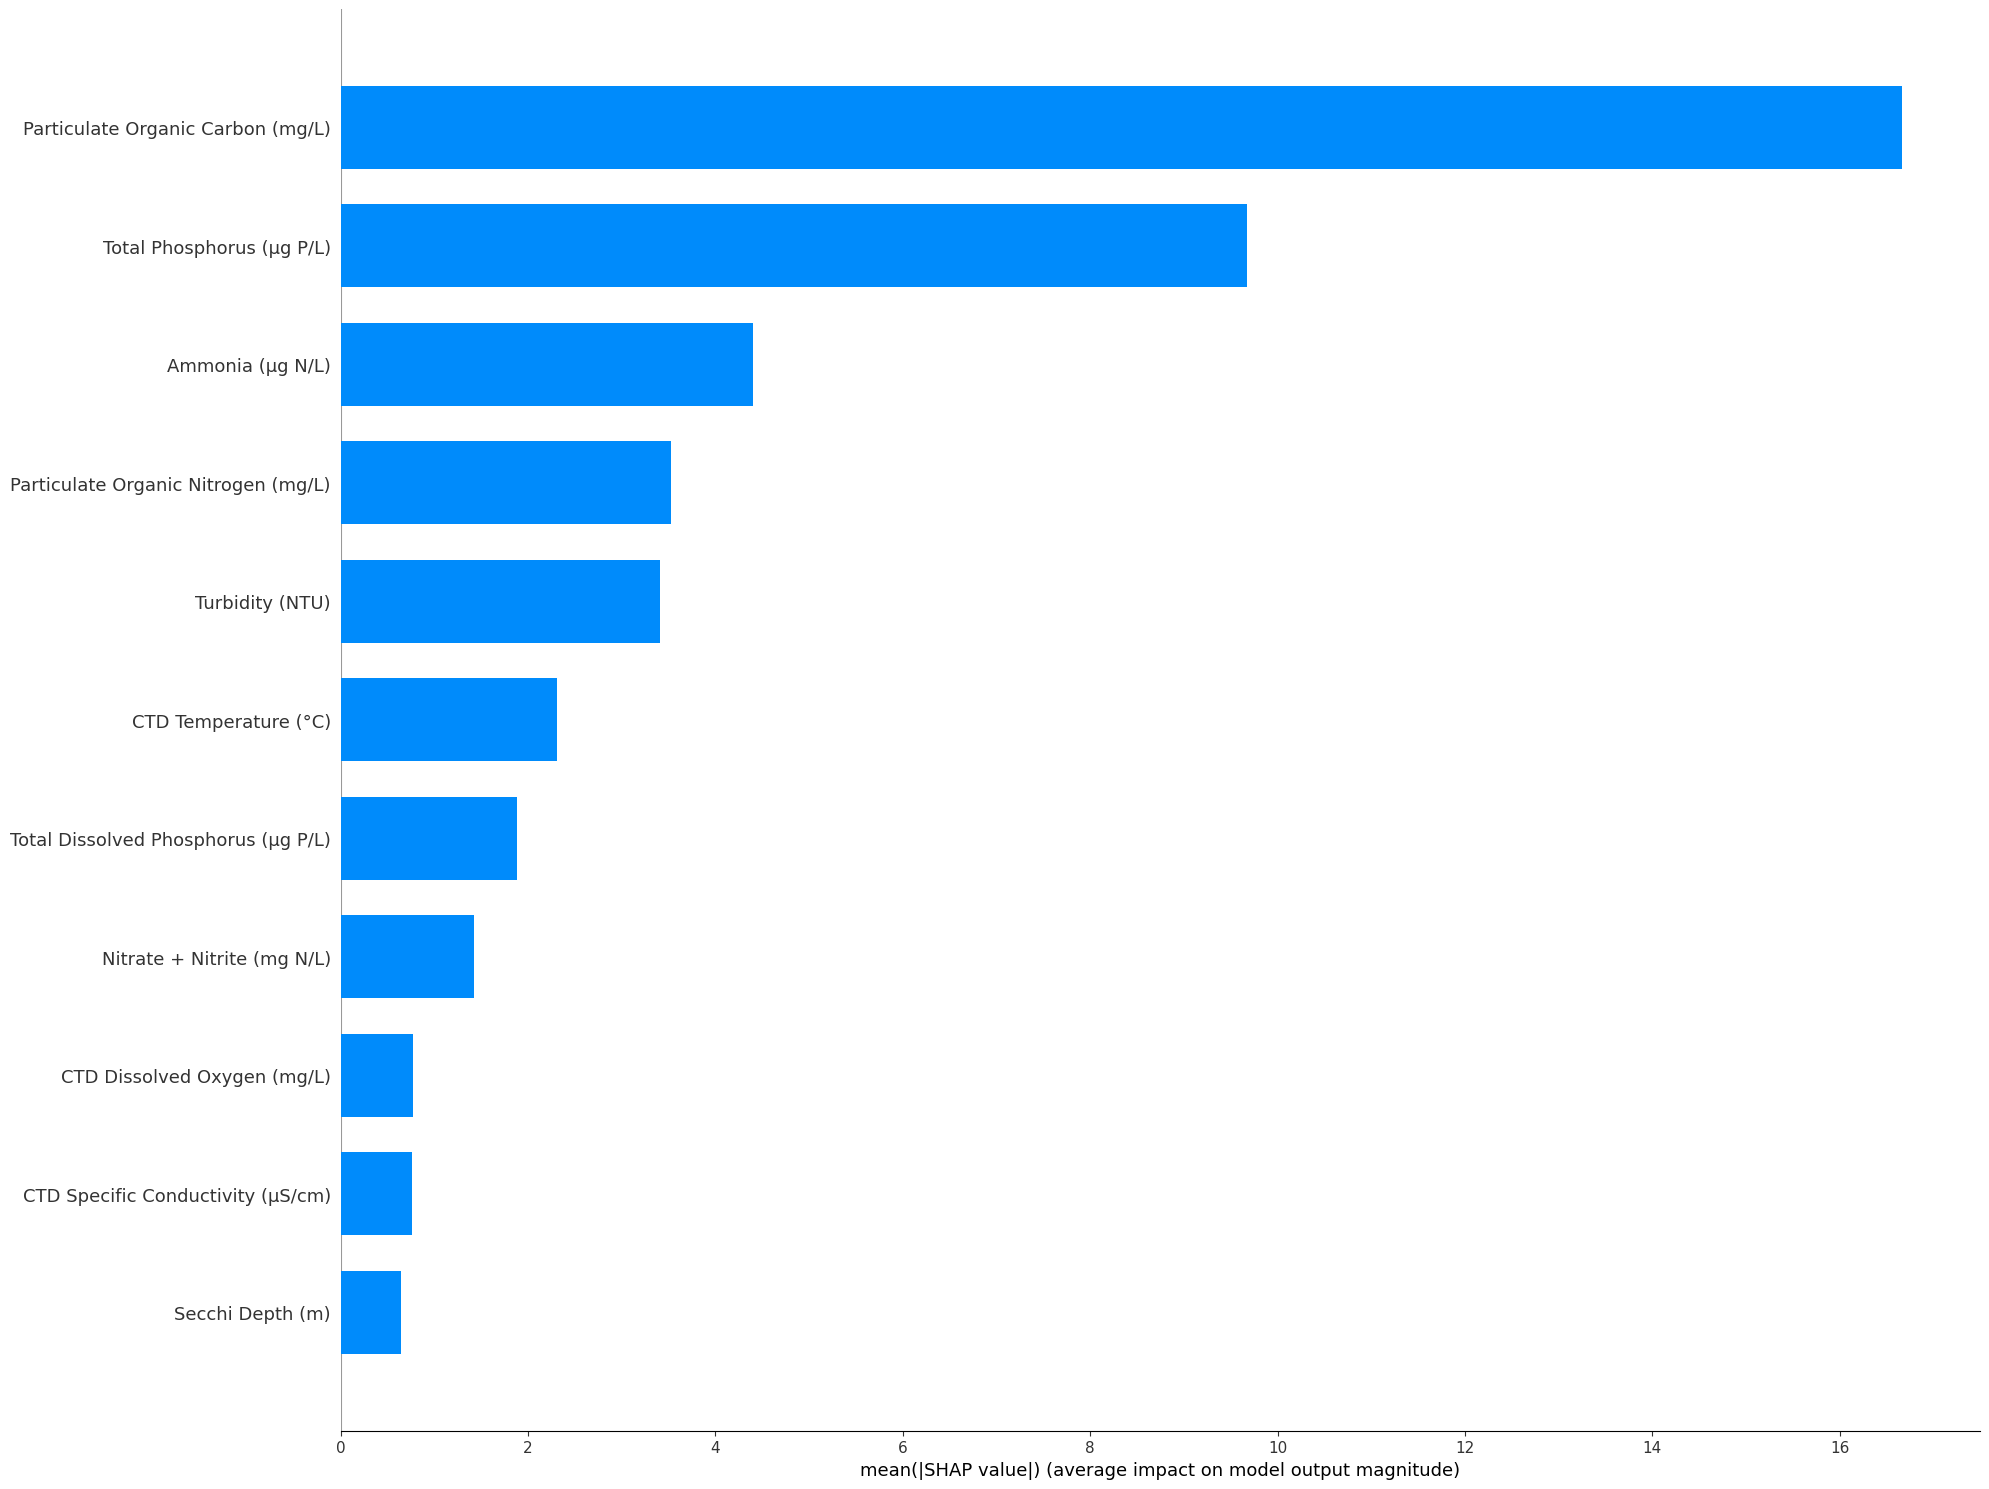

In [33]:
shap.summary_plot(shap_values, X_test,feature_names = features,plot_type="bar",plot_size=(20,15),show=False)

In [1]:
import lime
from lime import lime_tabular
 
# Instantiating the explainer object by passing in the training set,
# and the extracted features
explainer_lime = lime_tabular.LimeTabularExplainer(X_train,
                                                   feature_names=features,
                                                   verbose=True, 
                                                   mode='regression')
exp_lime = explainer_lime.explain_instance(
    X_test[1], mlp_model.predict, num_features=12)
exp_lime.show_in_notebook()

NameError: name 'X_train' is not defined